# Team 5

## Team members
***
1. Нагорный Павел / NPV
2. Elena Nazarenko 
3. Elena Popkova
4. Ruslan Kamyshenkov / Kamyshenkov_Ruslan
5. Mike Mednikov
6. Vitaliy Glushchenko

## Task
***
Нужно решить задачу с помощью 3х методов:
1. кнн
2. дерева принятия решения
3. логистической регрессии

Залить, на ваш взгляд, лучшее решение.

Это командное ДЗ, его нужно выполнить совместно с вашими коллегами. Коммит делается от одного выбранного участника. Для зачета нужно:
1. предоставить ноутбук с кодом, где вы попробовали все 3 метода
2. залить предсказания для теста и найти себя в лидерборде

Команда, занявшая 1 место, получит дополнительный балл. Метрика качества ROC-AUC. Дедлайн расширенный.

Поехали...

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, validation_curve
from sklearn.linear_model import LogisticRegression

from scipy.stats import randint as randint
from scipy.stats import uniform

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.model_selection import cross_val_score

from matplotlib import pyplot as plt
%matplotlib inline

def parse(object):
    for i in object.columns:
        if str(object[i].dtype) == 'object':
            print("\n=================\ncolumn: ",i,"\n")
            print(object[i].value_counts()) 
            print('\n')

***
## Предварительный (очень краткий) анализ

In [2]:
# получим данные для обучения
df_train = pd.read_csv('data/train.csv')
print(df_train.shape,"\n")
print("количество неполных записей\n",df_train.isnull().sum(),"\n")
df_train.info()

(24712, 22) 

количество неполных записей
 _id               0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
target            0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null o

In [3]:
parse(df_train)


column:  _id 

7801625f1548878dc30cb232c85f9979    1
c41cdef11d7af339dd61c5db1a96f981    1
c71b86df0288dab675b377a040429763    1
2c3f83c830dbefa3542c531f75887aac    1
a228ff6e54d32bb714f5c97c394ebe3e    1
8c10cf7fb63a271a356a191b948f5ec2    1
2889581df290aa27fd1beb0cff59eaa0    1
4b3ac192c3af6c603a18845a309b25dd    1
45a18c9d94cb99f353342f9ffb01a62c    1
5ecc132cf6cd1d19ab310df0fd90dbb9    1
4ba714f703f55849b0f97f1f04b90693    1
144be2aeb87e1213b37551154d312086    1
0402209805d98656e722b84715689a99    1
8b9e08fc0db11b79c0f4ad6f8d4ca934    1
7062c94a0be665aed35bb0f54f516d74    1
4639a0c20d98eeee97cb083b435e9c15    1
d88ba62bccc3e1f03821481428fc1106    1
0a71b28ccc0147f56a415929e000ff38    1
951b2cd20ebe5d1847bbd6d285b6bb07    1
06d1641ce5829b15b63279edfff41a8b    1
1f8c68fc740ef487a31f7ca0b494a240    1
34e385fc6017b59eea3d5ecf04e296bb    1
e60f947d07c0908f1891b2b658a16bbe    1
eff953d6034dbf9f13fd15c3b483e78f    1
6e915ca2227365477dd4fc943e692791    1
b32b94d20d68a43a999671db1538dda9  

### предварительные выводы для \_train
1. пустышек нет   
2. ряд колонок - объекты и требуют кодирования
3. перекосов в данных нет, ибо все более-менее одинаково (отсутствуют в одной колонке величины типа 1'000'000 и 10..50)



In [4]:
# получим данные для анализа
df_test = pd.read_csv('data/test.csv')
print(df_test.shape,"\n")
print("количество неполных записей\n",df_test.isnull().sum(),"\n")
df_test.info()

(16476, 21) 

количество неполных записей
 _id               0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 21 columns):
_id               16476 non-null object
age               16476 non-null int64
job               16476 non-null object
marital           16476 non-null object
education         16476 non-null object
default           16476 non-null object
housing           16476 non-null object
loan              16476 non-null object
contact           16476 non-null object
month             16476 non-null object
day_of_week   

In [5]:
parse(df_test)


column:  _id 

e42af148b2e620470f8c9e805848fc30    1
4b0a1189d30d0b5d18762777dda4eb48    1
2d5094b3ec66aeaae694e564e96059f9    1
28bf585569391de52b8a45d130e50a8d    1
21cc653fef37caadc19af124c8544c1e    1
77125555447850de4fd381aa056f7586    1
a2a4086a7568a25880aa0351b7236705    1
b4a68178108861db972cbbf379b9270e    1
07b6c5a52a9e6edf7d009f3c77841f88    1
036fd45002bda06ca5c565ab432a1229    1
9f351b77b9b7a9d06d94d1eb57eff410    1
a5d9c63ac00424a8487b19ce84a4ed27    1
f2c56e9465891c306e1e4c3db08733f6    1
763e73b6f265be39ca91f451a5bae770    1
9c4c5ea549bbabbd11ca26f6d7eec8c4    1
297abf59ebe5258d019902089160662c    1
c42b40bd1e940ed5f02aee9813a40f72    1
c74fb643d84c768b8d520e5735022aa3    1
14a0005b18ec170b005d874478f58d33    1
cc615688b6b6f4b8ade25b1036492c90    1
eb74234cb882f0fedae27f0b9e9957d8    1
622887316ed0f1475ec8a73940519641    1
3e2bcaf3b3afbacaafbd76f17b7a2fd7    1
e903d5039d28e711ec9f9cd221a3db4f    1
08fc4ee93099672b98cfb5a743e684fa    1
3220ee8bc10b26a2b18c184d0c54d53f  

### предварительные выводы для \_test
1. пустышек нет   
2. ряд колонок - объекты и требуют кодирования
3. перекосов в данных нет, ибо все более-менее одинаково (отсутствуют в одной колонке величины типа 1'000'000 и 10..50)



### окончательные выводы по данным
1. пустышек нет, заполнять искусственно нет необходимости
2. колонки с типом данных "object" должны быть подвергнуты one-hot-encoding
3. настораживает поле дефолта по кредиту [default] - полагаю есть смысл его удалить?
4. в силу того, что я не знаю, как работает эта doom machine (я не настолько зверюга, чтобы с наскока понять эту математику), считаю использование scaler необходимым (хотя я и не видел перекосов в данных)


***
## Подготовка обучающих данных

In [6]:
def preproc_data(df_input):
    df_output = df_input.copy()
    df_output = df_output.drop(['default','emp.var.rate','cons.conf.idx'], axis=1)
    #Кодируем категориальные признаки
    df_output = pd.get_dummies(df_output, columns=['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome'])
    return df_output

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,24712.0,40.030188,10.462301,17.000,32.000,38.000,47.000,98.000
duration,24712.0,258.345298,261.573344,0.000,102.000,180.000,319.000,4918.000
campaign,24712.0,2.580163,2.776757,1.000,1.000,2.000,3.000,43.000
pdays,24712.0,963.558797,184.224885,0.000,999.000,999.000,999.000,999.000
previous,24712.0,0.171900,0.491511,0.000,0.000,0.000,0.000,6.000
emp.var.rate,24712.0,0.082713,1.572300,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,24712.0,93.576386,0.579548,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,24712.0,-40.516077,4.639359,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,24712.0,3.619397,1.737099,0.634,1.344,4.857,4.961,5.045
nr.employed,24712.0,5166.988111,72.516221,4963.600,5099.100,5191.000,5228.100,5228.100


In [8]:
#regrDF = df_train.pipe(preproc_data)
#import seaborn as sns
#plt.figure(figsize=(100, 100))
#sns.heatmap(regrDF.corr('kendall'), annot=True);

In [9]:
#regrDF.describe().T

In [10]:
# обработаем _train 
df_train_preproc = df_train.pipe(preproc_data)

# получим вектор y и матрицу признаков Х (попутно удалив колонку _id, ибо она ну совсем не нужна нам) 
y = df_train_preproc['target']
X = df_train_preproc.drop(['_id', 'target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [11]:
df_train_preproc.describe().T

,count,mean,std,min,25%,50%,75%,max
age,24712.0,40.030188,10.462301,17.000,32.000,38.000,47.000,98.000
duration,24712.0,258.345298,261.573344,0.000,102.000,180.000,319.000,4918.000
campaign,24712.0,2.580163,2.776757,1.000,1.000,2.000,3.000,43.000
pdays,24712.0,963.558797,184.224885,0.000,999.000,999.000,999.000,999.000
previous,24712.0,0.171900,0.491511,0.000,0.000,0.000,0.000,6.000
cons.price.idx,24712.0,93.576386,0.579548,92.201,93.075,93.749,93.994,94.767
euribor3m,24712.0,3.619397,1.737099,0.634,1.344,4.857,4.961,5.045
nr.employed,24712.0,5166.988111,72.516221,4963.600,5099.100,5191.000,5228.100,5228.100
target,24712.0,0.112779,0.316329,0.000,0.000,0.000,0.000,1.000
job_admin.,24712.0,0.253075,0.434783,0.000,0.000,0.000,1.000,1.000


In [12]:
X_test.shape

(7414, 58)

In [13]:
y_test.shape

(7414,)

In [14]:
X_train.shape

(17298, 58)

In [15]:
y_train.shape

(17298,)

***

# Три метода анализа

## Метод KNeighborsClassifier

In [16]:
model_KNN = Pipeline([ ('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=3)) ])

model_KNN.fit(X_train, y_train)

predict_KNN = model_KNN.predict(X_test)
predict_proba_KNN = model_KNN.predict_proba(X_test)

## Метод DecisionTreeClassifier (один гиперпараметр)

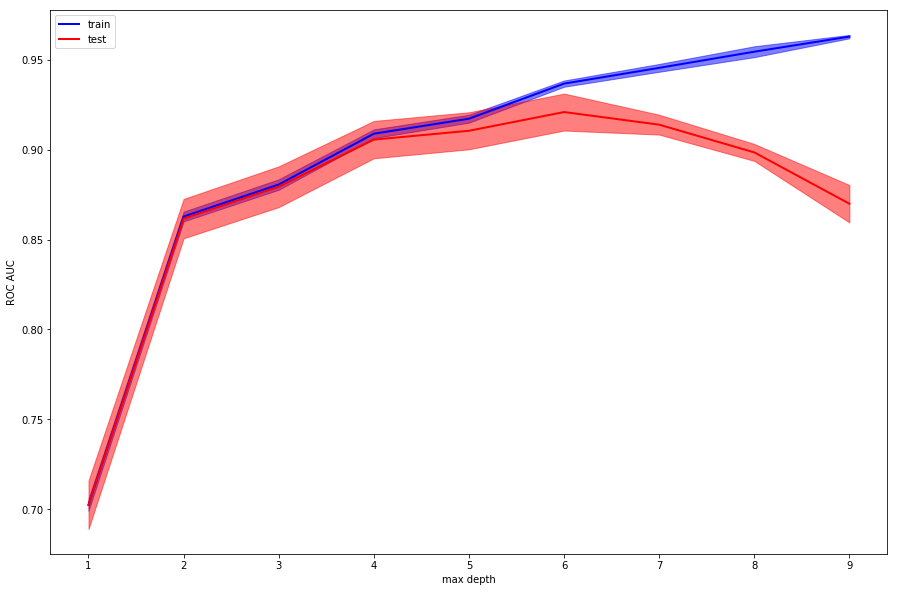

In [17]:
model_DTC = DecisionTreeClassifier(random_state=123)
model_DTC.fit(X_train, y_train)

# кросс-валидируем, 5 частей
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=132)

# validation_curve(estimator, X, y, param_name, param_range, groups=None, cv=None, scoring=None, n_jobs=1, pre_dispatch='all', verbose=0)
train_scores, valid_scores = validation_curve(model_DTC, X, y, 'max_depth', range(1, 10), cv=cv, scoring='roc_auc')

train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)

valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

plt.figure(figsize=(15, 10))

plt.fill_between(range(1,10), train_score_mean-train_score_std, train_score_mean+train_score_std, color='b',
                 interpolate=True, alpha=0.5,)
plt.fill_between(range(1,10), valid_scores_mean-valid_scores_std, valid_scores_mean+valid_scores_std, color='r', 
                 interpolate=True, alpha=0.5)

plt.plot(range(1,10), train_score_mean, c='b', lw=2)
plt.plot(range(1,10), valid_scores_mean, c='r', lw=2)

plt.xlabel('max depth')
plt.ylabel('ROC AUC')
plt.legend(['train','test'],loc='best')

plt.show()

In [18]:
# в нашем случае используем глубину перебора, равную 5 (или все же 6?)
max_depth = 5
model_DTC = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=123)
model_DTC.fit(X_train, y_train)

predict_DTC = model_DTC.predict(X_test)
predict_proba_DTC = model_DTC.predict_proba(X_test)

## Метод DecisionTreeClassifier v/ Random (перебор гиперпараметров)

In [19]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': randint(2, 8),
    'min_samples_leaf': randint(5, 10),
    'class_weight': [None, 'balanced']}

cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

model = DecisionTreeClassifier(random_state=123)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=200, n_jobs=-1,
                                   cv=cv, scoring='roc_auc', random_state=123)
random_search.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
          error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a197f2ef0>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a197f2780>, 'class_weight': [None, 'balanced']},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [20]:
random_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 7}

In [21]:
random_search.best_score_

0.9375006574168466

In [22]:
random_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=6, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [23]:
model_DTC_Random = random_search.best_estimator_
predict_DTC_Random = model_DTC_Random.predict(X_test)
predict_proba_DTC_Random = model_DTC_Random.predict_proba(X_test)

## Метод LogisticRegression

In [24]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
predict_LR = model_LR.predict(X_test)
predict_proba_LR = model_LR.predict_proba(X_test)

***
# Сравнение результатов работы

In [25]:
print('KNeighborsClassifier\n--------------\n', classification_report(y_test, predict_KNN))
print('\nDecisionTreeClassifier\n--------------\n', classification_report(y_test, predict_DTC))
print('\nDecisionTreeClassifier (Random)\n--------------\n', classification_report(y_test, predict_DTC_Random))
print('\nLogisticRegression\n--------------\n',classification_report(y_test, predict_LR))

KNeighborsClassifier
--------------
              precision    recall  f1-score   support

          0       0.91      0.97      0.94      6574
          1       0.54      0.29      0.37       840

avg / total       0.87      0.89      0.88      7414


DecisionTreeClassifier
--------------
              precision    recall  f1-score   support

          0       0.93      0.98      0.95      6574
          1       0.69      0.43      0.53       840

avg / total       0.90      0.91      0.91      7414


DecisionTreeClassifier (Random)
--------------
              precision    recall  f1-score   support

          0       0.99      0.82      0.90      6574
          1       0.41      0.95      0.57       840

avg / total       0.93      0.84      0.86      7414


LogisticRegression
--------------
              precision    recall  f1-score   support

          0       0.92      0.98      0.95      6574
          1       0.70      0.37      0.48       840

avg / total       0.90      0.91

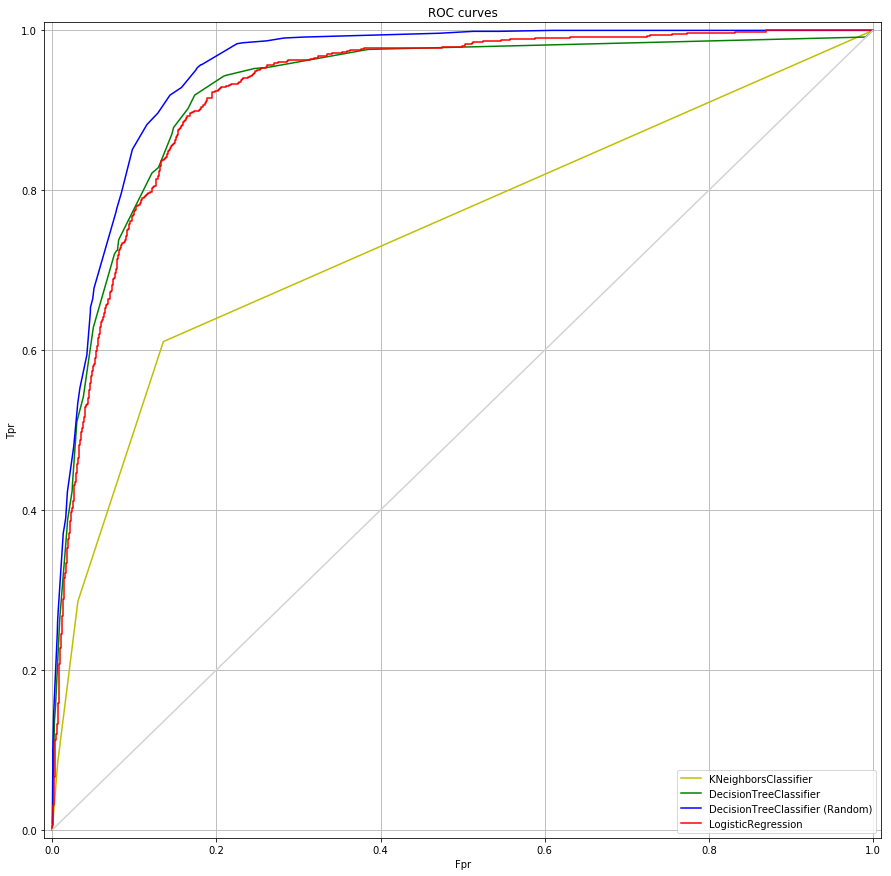

In [26]:
#Отобразим ROC_AUC
plt.figure(figsize=(15, 15))
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

plt.ylabel('Tpr')
plt.xlabel('Fpr')
plt.title('ROC curves')

Fpr_KNN, Tpr_KNN, thresholds = roc_curve(y_test, predict_proba_KNN[:,1])
plt.plot(Fpr_KNN, Tpr_KNN, 'y-' ,label='KNeighborsClassifier')

Fpr_DTC, Tpr_DTC, thresholds = roc_curve(y_test, predict_proba_DTC[:,1])
plt.plot(Fpr_DTC, Tpr_DTC, 'g-' ,label='DecisionTreeClassifier')

Fpr_DTC_Random, Tpr_DTC_Random, thresholds = roc_curve(y_test, predict_proba_DTC_Random[:,1])
plt.plot(Fpr_DTC_Random, Tpr_DTC_Random, 'b-' ,label='DecisionTreeClassifier (Random)')

Fpr_LR, Tpr_LR, thresholds = roc_curve(y_test, predict_proba_LR[:,1])
plt.plot(Fpr_LR, Tpr_LR, 'r-', label='LogisticRegression')

plt.plot([0, 1], [0, 1], 'lightgray')
plt.grid(True)
plt.legend()
plt.show()

In [27]:
roc_auc_KNN = roc_auc_score(y_test, predict_proba_KNN[:,1])
roc_auc_DTC= roc_auc_score(y_test, predict_proba_DTC[:,1])
roc_auc_DTC_Random = roc_auc_score(y_test, predict_proba_DTC_Random[:,1])
roc_auc_LR = roc_auc_score(y_test, predict_proba_LR[:,1])

print('ROC_AUC\n--------------')
print('KNeighborsClassifier:\t\t\t', roc_auc_KNN)
print('DecisionTreeClassifier:\t\t\t', roc_auc_DTC)
print('DecisionTreeClassifier (Random):\t', roc_auc_DTC_Random)
print('LogisticRegression:\t\t\t', roc_auc_LR)

ROC_AUC
--------------
KNeighborsClassifier:			 0.7478493017225144
DecisionTreeClassifier:			 0.9260242368928101
DecisionTreeClassifier (Random):	 0.9500603930346097
LogisticRegression:			 0.9254556188158257


In [28]:
cvs_KNN = cross_val_score(model_KNN, X, y, scoring='roc_auc', cv=10).mean()
cvs_DTC = cross_val_score(model_DTC, X, y, scoring='roc_auc', cv=10).mean()
cvs_DTC_Random = cross_val_score(model_DTC_Random, X, y, scoring='roc_auc', cv=10).mean()
cvs_LR = cross_val_score(model_LR, X, y, scoring='roc_auc', cv=10).mean()

print('AVG_ROC_AUC\n------------')
print('KNeighborsClassifier\t\t\t', cvs_KNN)
print('DecisionTreeClassifier\t\t\t', cvs_DTC)
print('DecisionTreeClassifier (Random)\t\t', cvs_DTC_Random)
print('Logistic Regression\t\t\t', cvs_LR)


AVG_ROC_AUC
------------
KNeighborsClassifier			 0.7491279901976811
DecisionTreeClassifier			 0.933970698932564
DecisionTreeClassifier (Random)		 0.9390171909796253
Logistic Regression			 0.927523052662486


***
# Используем лучший алгоритм

## Подготовка тестовых данных

In [29]:
# переполучим данные заново, чистоты для 
df_test = pd.read_csv('data/test.csv')

# почистим и преобразуем
df_test_preproc = df_test.pipe(preproc_data)
X_test = df_test_preproc.drop(['_id'], axis=1)

# и наконец сделаем предсказание
result_predict = model_DTC_Random.predict(X_test)

In [30]:
X_test.shape,result_predict.shape,result_predict

((16476, 58), (16476,), array([0, 0, 0, ..., 0, 0, 0]))

In [31]:
df_test['target'] = result_predict
#df_test.head().T
#df_test.info()
df_test.to_csv('data/team5full_df.csv', sep=',', encoding='utf-8', index=False)

In [32]:
submit2kaggle = pd.DataFrame({'_id':df_test['_id'],'target':result_predict})
#submit2kaggle.head(20)
#submit2kaggle.info()
submit2kaggle.to_csv('data/team5result.csv', sep=',', encoding='utf-8', index=False)